# Exercises from Linear Algebra for DS

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (7,7)

In [2]:
#function to create nd vectors in (0, 10, 0, 10)
def vec(dim=2):
    return np.random.rand(dim)*10

# function to create row-vectors
def row(dim=2):
    return np.array([vec(dim=2)])

## Chapter 6

### Exercise 6.1

Calculate frobenius norm

In [16]:
def frobenius_norm(A):
    return np.sum(A**2)**0.5

<AxesSubplot:>

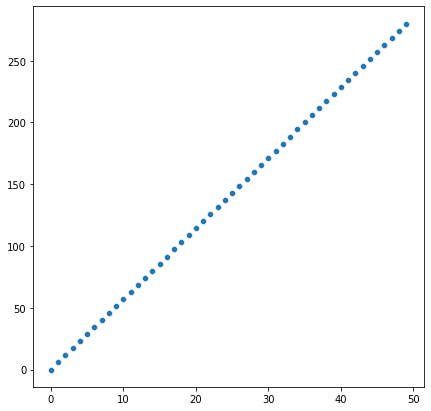

In [35]:
matrix = []

for x in np.arange(10):
    A = np.random.rand(10,10)
    matrix.append([frobenius_norm(A*x) for x in np.arange(50)])

mean_norms = np.mean(matrix, axis=0)

sns.scatterplot(x=np.arange(50), y=mean_norms)

# I think I might be misunderstanding the exercise, because I have completely different picture

### Exercise 6.2

frobenius distance

In [67]:
def frobenius_distance(X, Y):
    return frobenius_norm(X-Y)

Frobenius distance between X,Y is 0.9032574499568756, number of iterations is 5


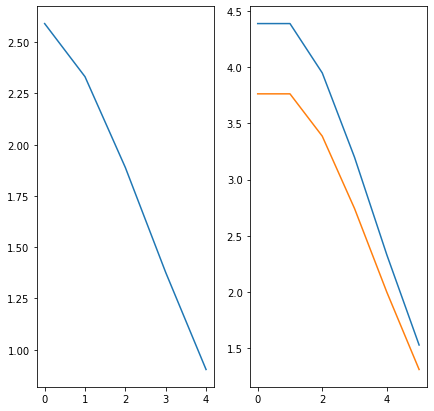

In [68]:
X = np.random.rand(7,7)
Y = np.random.rand(7,7)

xfn = [frobenius_norm(X)]
yfn = [frobenius_norm(Y)]

fd = []

s = 1

while frobenius_distance(X,Y) > 1:
    X = X * s
    Y = Y * s
    
    s *= 0.9
    
    xfn.append(frobenius_norm(X))
    yfn.append(frobenius_norm(Y))
    
    fd.append(frobenius_distance(X,Y))
    
print(f'Frobenius distance between X,Y is {frobenius_distance(X,Y)}, number of iterations is {round(math.log(s, 0.9))}')

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(fd)

ax2.plot(xfn)
ax2.plot(yfn)

### Exercise 6.3

Trace of matrix

In [82]:
A = np.round(np.random.rand(10,10)*10)

In [83]:
frobenius_norm(A) == np.trace(A.T @ A)**0.5 # > True

True

In [84]:
frobenius_norm(A) == np.trace(A @ A.T)**0.5 # > True

True